# SST long-term trend

Compute the long-term trend in sea surface temperature from 1990 to 2009 using the dataset "Smith and Reynolds NCDC Level 4 Historical Reconstructed SST" from PODAAC / NASA (or any other-20 year period).

https://podaac.jpl.nasa.gov/dataset/REYNOLDS_NCDC_L4_SST_HIST_RECON_MONTHLY_V3B_NETCDF?ids=Measurement:GridSpatialResolution&values=Ocean%20Temperature:%5B0.25%20TO%20*%5D

Implement a function which performs a linear regression:
https://en.wikipedia.org/wiki/Simple_linear_regression


Useful Julia functions for the exercise:
* download
* Dataset from NCDatasets
* sum, mean


In [7]:
using NCDatasets
using PyPlot
using Missings
using PyCall
using PyCall: PyObject, pyimport


PyObject(x::Adjoint) = PyObject(copy(x))
function PyObject(a::Array{Union{T,Missing},N}) where {T,N}
  numpy_ma = pyimport("numpy")["ma"]
  pycall(numpy_ma["array"], Any, coalesce.(a,zero(T)), mask=ismissing.(a))
end

PyObject

In [38]:
using Printf
using Dates
filenames = []
ssttime = []
for year = 1980:2000
for month = 1:12
    monthstr = @sprintf("%02d",month)
    # ersst.196001.nc -> ersst.1960$monthstr.nc
    filename = "ersst.$year$monthstr.nc"
    url = "ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/$year/ersst.$year$monthstr.nc"

    @show url,filename
    if !isfile(filename)
        #download(url,filename)
    end
    push!(filenames,filename)    
    push!(ssttime,DateTime(year,month,15))
end
end

(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1980/ersst.198001.nc", "ersst.198001.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1980/ersst.198002.nc", "ersst.198002.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1980/ersst.198003.nc", "ersst.198003.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1980/ersst.198004.nc", "ersst.198004.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1980/ersst.198005.nc", "ersst.198005.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1980/ersst.198006.nc", "ersst.198006.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1980/ersst.198007.nc", "ersst.198007.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/nc

(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1986/ersst.198605.nc", "ersst.198605.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1986/ersst.198606.nc", "ersst.198606.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1986/ersst.198607.nc", "ersst.198607.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1986/ersst.198608.nc", "ersst.198608.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1986/ersst.198609.nc", "ersst.198609.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1986/ersst.198610.nc", "ersst.198610.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1986/ersst.198611.nc", "ersst.198611.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/nc

(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1992/ersst.199211.nc", "ersst.199211.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1992/ersst.199212.nc", "ersst.199212.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1993/ersst.199301.nc", "ersst.199301.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1993/ersst.199302.nc", "ersst.199302.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1993/ersst.199303.nc", "ersst.199303.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1993/ersst.199304.nc", "ersst.199304.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1993/ersst.199305.nc", "ersst.199305.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/nc

(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1999/ersst.199903.nc", "ersst.199903.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1999/ersst.199904.nc", "ersst.199904.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1999/ersst.199905.nc", "ersst.199905.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1999/ersst.199906.nc", "ersst.199906.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1999/ersst.199907.nc", "ersst.199907.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1999/ersst.199908.nc", "ersst.199908.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/ncei/v3b/monthly/netcdf/1999/ersst.199909.nc", "ersst.199909.nc")
(url, filename) = ("ftp://podaac-ftp.jpl.nasa.gov/allData/ersst/L4/nc

In [37]:
ssttime

252-element Array{Any,1}:
 1980-01-15T00:00:00
 1980-02-15T00:00:00
 1980-03-15T00:00:00
 1980-04-15T00:00:00
 1980-05-15T00:00:00
 1980-06-15T00:00:00
 1980-07-15T00:00:00
 1980-08-15T00:00:00
 1980-09-15T00:00:00
 1980-10-15T00:00:00
 1980-11-15T00:00:00
 1980-12-15T00:00:00
 1981-01-15T00:00:00
 ⋮                  
 2000-01-15T00:00:00
 2000-02-15T00:00:00
 2000-03-15T00:00:00
 2000-04-15T00:00:00
 2000-05-15T00:00:00
 2000-06-15T00:00:00
 2000-07-15T00:00:00
 2000-08-15T00:00:00
 2000-09-15T00:00:00
 2000-10-15T00:00:00
 2000-11-15T00:00:00
 2000-12-15T00:00:00

In [33]:
ds = Dataset(filenames[1])
temp = ds["sst"][:,:,1,1];


In [31]:
close(ds)
pcolor(temp'); colorbar()

BoundsError: BoundsError: attempt to access 2-element Array{Int64,1} at index [3]

In [24]:
size(temp)

(180, 89)

In [26]:
temp[100,20]

11.773043f0

In [28]:
SST = allowmissing(zeros(180, 89,length(filenames)));

for i = 1:length(filenames)
    ds = Dataset(filenames[i])
    temp = ds["sst"][:,:,1,1]
    close(ds)
    
    SST[:,:,i] = temp;
end

In [29]:
size(SST)

(180, 89, 252)

252-element Array{DateTime,1}:
 1980-01-15T00:00:00
 1980-02-15T00:00:00
 1980-03-15T00:00:00
 1980-04-15T00:00:00
 1980-05-15T00:00:00
 1980-06-15T00:00:00
 1980-07-15T00:00:00
 1980-08-15T00:00:00
 1980-09-15T00:00:00
 1980-10-15T00:00:00
 1980-11-15T00:00:00
 1980-12-15T00:00:00
 1981-01-15T00:00:00
 ⋮                  
 2000-01-15T00:00:00
 2000-02-15T00:00:00
 2000-03-15T00:00:00
 2000-04-15T00:00:00
 2000-05-15T00:00:00
 2000-06-15T00:00:00
 2000-07-15T00:00:00
 2000-08-15T00:00:00
 2000-09-15T00:00:00
 2000-10-15T00:00:00
 2000-11-15T00:00:00
 2000-12-15T00:00:00

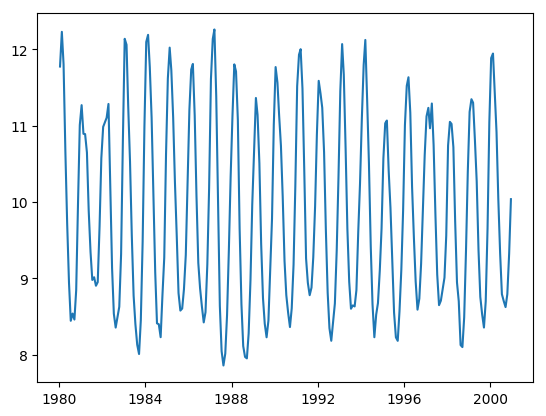

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f842dd2b9b0>

In [46]:
plot(DateTime.(ssttime),SST[100,20,:])

In [51]:
using Statistics
# y ≈ a + b*x
function linear_regression(x,y)
    xm = mean(x)
    ym = mean(y)
    ss_xx = sum((x .- xm).^2)
    ss_yy = sum((y .- ym).^2)
    ss_xy = sum((x .- xm) .* (y .- ym))
    b = ss_xy / ss_xx
    a = ym - b * xm
    r2 = ss_xy^2 / (ss_xx*ss_yy)
    return a,b,r2
end

linear_regression (generic function with 1 method)

In [50]:
x = [0,1,2]
y = 1 .+ 3 * x
a,b,r2 = linear_regression(x,y)

(1.0, 3.0, 1.0)

In [58]:
yeartime = Dates.value.(ssttime) / (1000 * 60 * 60 * 24 * 365.25);

linear_regression(yeartime,SST[100,20,:])

(28.101370118559792, -0.009157437496070788, 0.002004619278203556)

In [62]:
a = allowmissing(zeros(180, 89))
b = allowmissing(zeros(180, 89))
r2 = allowmissing(zeros(180, 89))

for i = 1:180
    for j = 1:89
      a[i,j],b[i,j],r2[i,j] = linear_regression(yeartime,SST[i,j,:])
    end
end

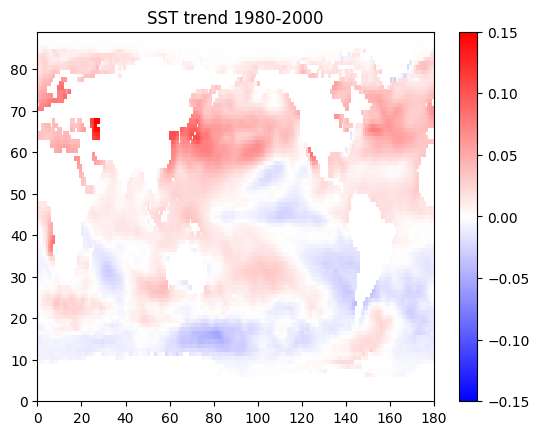

PyObject Text(0.5, 1.0, 'SST trend 1980-2000')

In [70]:
pcolor(b'; cmap="bwr");  colorbar(); clim(-0.15,0.15)
title("SST trend 1980-2000")